In [1]:
import sklearn
sklearn.__version__

'0.20.2'

In [2]:
from sklearn.neighbors import KDTree
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline 

import seaborn as sns
sns.set(style="white", color_codes=True) 

In [3]:
X = np.array([ [-1, -1], 
               [-2, -1], 
               [-3, -2], 
               [ 1,  1], 
               [ 2,  1], 
               [ 3,  2]]
            )
     

In [4]:
# get columns  
X1, X2 = zip(*X)

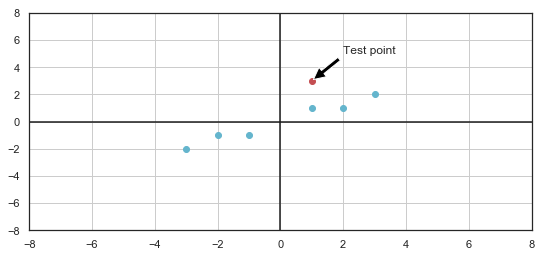

In [5]:
plt.figure(figsize=(9,4))
plt.grid()
plt.axis([-8, 8, -8, 8])
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')

plt.scatter(X1, X2, color='c')
#plt.annotate('', xy=(X1, X2), xytext=(6, 7), arrowprops=dict(facecolor='black', shrink=0.05));

# test point
X_test = [[1, 3]]
X_test1, X_test2 = zip(*X_test)

plt.scatter(X_test1, X_test2, color='r')
plt.annotate('Test point', xy=(1, 3), xytext=(2, 5), arrowprops=dict(facecolor='black', shrink=0.05));

In [6]:
x1 = [[1,2], [3,4], [5,6]]

# get columns    
a, b = zip(*x1)   # zip(*foo())

# a, b = map(list, zip(*x))  # if you prefer lists over tuples
print(a)
# (1, 3, 5)
print(b)

(1, 3, 5)
(2, 4, 6)


__Parameters:	__
- __X__ : array-like, shape = [n_samples, n_features]
n_samples is the number of points in the data set, and n_features is the dimension of the parameter space.

- __leaf_size__ : positive integer (default = 40)
Number of points at which to switch to brute-force. 
Changing leaf_size will not affect the results of a query, but can significantly impact the speed of a query and the memory required to store the constructed tree. 

- __metric__ : string or DistanceMetric object
the distance metric to use for the tree. Default=’minkowski’ with p=2 (that is, a euclidean metric). 

In [7]:
# instatiate the KDTree
kdt = KDTree(X, leaf_size=30, metric='euclidean')


__Parameters:	__
- X : An array of points to query

- k : integer (default = 1)
The number of nearest neighbors to return

- return_distance : boolean (default = True)
if True, return a tuple (d, i) of distances and indices if False, return array i

- sort_results : boolean (default = True)
if True, then distances and indices of each point are sorted on return, so that the first column contains the closest points. Otherwise, neighbors are returned in an arbitrary order.

__ returns __
- i     : if return_distance == False
- (d,i) : if return_distance == True

- d : array of doubles - shape: x.shape[:-1] + (k,)
each entry gives the list of distances to the neighbors of the corresponding point

- i : array of integers - shape: x.shape[:-1] + (k,)
each entry gives the list of indices of neighbors of the corresponding point

In [8]:
 kdt.query(X_test, k=2, return_distance = True) 

(array([[2.        , 2.23606798]]), array([[3, 4]], dtype=int64))

## Example 2

In [17]:
import pickle

In [7]:
np.random.seed(0)

In [11]:
X = np.random.random((10, 3))  # 10 points in 3 dimensions
X

array([[0.31856895, 0.66741038, 0.13179786],
       [0.7163272 , 0.28940609, 0.18319136],
       [0.58651293, 0.02010755, 0.82894003],
       [0.00469548, 0.67781654, 0.27000797],
       [0.73519402, 0.96218855, 0.24875314],
       [0.57615733, 0.59204193, 0.57225191],
       [0.22308163, 0.95274901, 0.44712538],
       [0.84640867, 0.69947928, 0.29743695],
       [0.81379782, 0.39650574, 0.8811032 ],
       [0.58127287, 0.88173536, 0.69253159]])

In [18]:
tree = KDTree(X, leaf_size=2)
s = pickle.dumps(tree) 

- some time later ....

In [19]:
tree_copy = pickle.loads(s)   

In [20]:
dist, ind = tree_copy.query(X[:1], k=3)  

In [21]:
print(ind)  # indices of 3 closest neighbors

[[0 3 6]]


In [22]:
print(dist)  # distances to 3 closest neighbors

[[0.         0.34311351 0.4358525 ]]


## Example 3

__scipy.spatial.KDTree__

kd-tree for quick nearest-neighbor lookup

This class provides an index into a set of k-dimensional points which can be used to rapidly look up the nearest neighbors of any point.

__Parameters__:
- data : (N,K) array_like, The data points to be indexed. This array is not copied, and so modifying this data will result in bogus results.

- leafsize : int, optional, The number of points at which the algorithm switches over to brute-force. Has to be positive.


In [46]:
from scipy import spatial

# import plotting libraries
import matplotlib
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
%matplotlib inline 

import seaborn as sns
sns.set(style="white", color_codes=True)
sns.set(font_scale=1)

In [24]:
x, y = np.mgrid[0:5, 2:8]

In [25]:
x

array([[0, 0, 0, 0, 0, 0],
       [1, 1, 1, 1, 1, 1],
       [2, 2, 2, 2, 2, 2],
       [3, 3, 3, 3, 3, 3],
       [4, 4, 4, 4, 4, 4]])

In [26]:
y

array([[2, 3, 4, 5, 6, 7],
       [2, 3, 4, 5, 6, 7],
       [2, 3, 4, 5, 6, 7],
       [2, 3, 4, 5, 6, 7],
       [2, 3, 4, 5, 6, 7]])

In [32]:
zip(x.ravel(), y.ravel())

In [33]:
list(zip(x.ravel(), y.ravel()))

[(0, 2),
 (0, 3),
 (0, 4),
 (0, 5),
 (0, 6),
 (0, 7),
 (1, 2),
 (1, 3),
 (1, 4),
 (1, 5),
 (1, 6),
 (1, 7),
 (2, 2),
 (2, 3),
 (2, 4),
 (2, 5),
 (2, 6),
 (2, 7),
 (3, 2),
 (3, 3),
 (3, 4),
 (3, 5),
 (3, 6),
 (3, 7),
 (4, 2),
 (4, 3),
 (4, 4),
 (4, 5),
 (4, 6),
 (4, 7)]

In [30]:
for each in zip(x.ravel(), y.ravel()):
    print(each)

(0, 2)
(0, 3)
(0, 4)
(0, 5)
(0, 6)
(0, 7)
(1, 2)
(1, 3)
(1, 4)
(1, 5)
(1, 6)
(1, 7)
(2, 2)
(2, 3)
(2, 4)
(2, 5)
(2, 6)
(2, 7)
(3, 2)
(3, 3)
(3, 4)
(3, 5)
(3, 6)
(3, 7)
(4, 2)
(4, 3)
(4, 4)
(4, 5)
(4, 6)
(4, 7)


KDTree.query(x, k=1, eps=0, p=2, distance_upper_bound=inf)

__Parameters:__	
- x : array_like, An array of points to query.
- k : integer, The number of nearest neighbors to return.
- p : float, 1<=p<=infinity

Which Minkowski p-norm to use. 
> - 1 is the sum-of-absolute-values “Manhattan” distance 
> - 2 is the usual Euclidean distance 


- distance_upper_bound : nonnegative float

Return only neighbors within this distance. This is used to prune tree searches, so if you are doing a series of nearest-neighbor queries, it may help to supply the distance to the nearest neighbor of the most recent point.

In [39]:
tree = spatial.KDTree(data=list(zip(x.ravel(), y.ravel())), leafsize=3)

In [40]:
test_pts = np.array([[0, 0], [2.1, 2.9]])

In [45]:
# query the tree
n_neighbors = 3
tree.query(test_pts, k=n_neighbors)

(array([[2.        , 2.23606798, 2.82842712],
        [0.14142136, 0.90553851, 0.90553851]]), array([[ 0,  6, 12],
        [13, 12, 19]]))

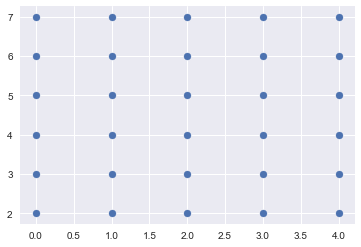

In [47]:
plt.scatter(x, y)

In [55]:
print('x: Mean : ', np.mean(x), 'Variance : ', np.var(x), 'Median : ', np.median(x))

x: Mean :  2.0 Variance :  2.0 Median :  2.0


In [56]:
print('y: Mean : ', np.mean(y), 'Variance : ', np.var(y), 'Median : ', np.median(y))

y: Mean :  4.5 Variance :  2.9166666666666665 Median :  4.5


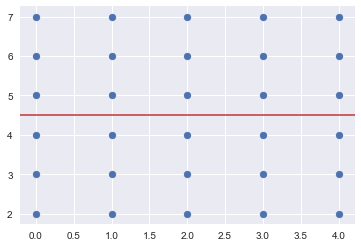

In [59]:
plt.axhline(y=4.5, color='r', linestyle='-')
plt.scatter(x, y)